# Data Exploration with tSNE

<b>Overview:</b> t-SNE reduction analysis was performed on our data set to identify potential opportunities for clustering. This analysis was performed on the raw x features and standardized x features. The following code shows the analysis on our iteratively imputed data set (to fill missign values) given this was the ultimate approach our group decided to pursue. 

## Import and Prepare Data (Beyond Initial Data Clean Up)

In [1]:
#Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
dataset = pd.read_csv("hospitaldata_iterative.csv.txt")

In [39]:
dataset.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.500000,4.500000,8.9,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,3.0,15.500000,3.996645,10.9,...,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0
2,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,3.6,14.900000,3.200000,8.8,...,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0,2.0
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,2.8,14.439599,3.997644,8.3,...,84.0,79.0,85.0,80.0,85.0,86.0,85.0,185.0,27.0,2.0
4,010011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235.0,2.6,14.100000,3.700000,8.9,...,83.0,77.0,86.0,82.0,87.0,81.0,86.0,2193.0,33.0,3.0


In [34]:
#Drop blank columns
dataset.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1, inplace = True)

### Create X and Y data sets

In [130]:
#Create X and Y forboth  regression model and classification models (with Hospital Recommend and Star Scores, respectively)
x = dataset.copy()
x.drop(["Provider ID", "Hospital Name", "Address", "City", "ZIP Code", "State", "STAR_RATING", "H_RECMND_LINEAR_SCORE"], \
           axis = 1, inplace = True)
y_reg = dataset["H_RECMND_LINEAR_SCORE"]
y_class = dataset["STAR_RATING"]

### Create a Standardized Version of X variables to standardize features

<b>Note: </b>This step was taken given the varying scales of our X variables.

In [131]:
#create a copy
x_s = x.copy()

#standardize features to weight them equally
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_s = scaler.fit_transform(x)

## Initial t-SNE Analysis to Determine Optimal Learning Rate

<b>Purpose:</b> The purpose of this step is to determine the optimal learning rate. Ideally we are looking for potential clusters to emerge from the data set.

### Step 1: Iterate On Different Learning Rates to Identify Optimal Parameters for Raw X Variables

#### t-SNE with Learning Rate of 50

In [105]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=50)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

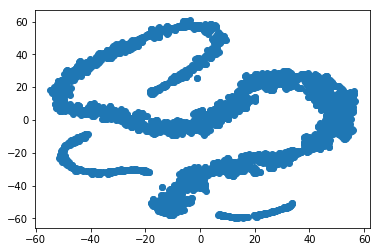

In [51]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 100

In [54]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=100)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

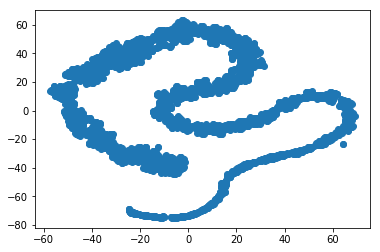

In [55]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 150

In [56]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=150)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

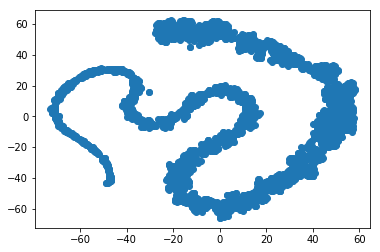

In [57]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 200

In [58]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=200)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

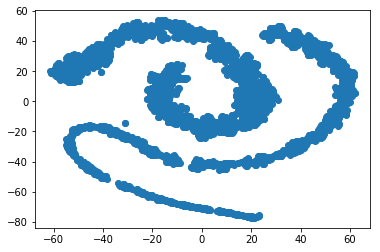

In [59]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

### Step 2: Iterate On Different Learning Rates to Identify Optimal Parameters for Standardized X Variables

#### t-SNE with Learning Rate of 50

In [132]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=50)

#Apply fit transform to x 
tsne_features = model.fit_transform(x_s)

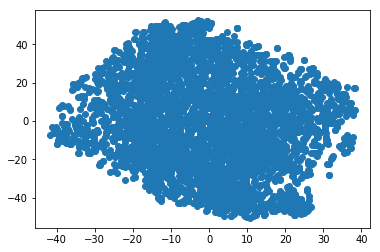

In [133]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 100

In [134]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=100)

#Apply fit transform to x 
tsne_features = model.fit_transform(x_s)

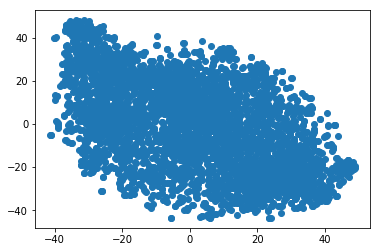

In [136]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 150

In [137]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=150)

#Apply fit transform to x 
tsne_features = model.fit_transform(x_s)

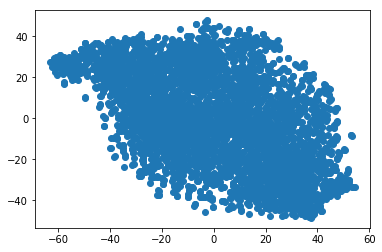

In [138]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### t-SNE with Learning Rate of 200

In [139]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=200)

#Apply fit transform to x 
tsne_features = model.fit_transform(x_s)

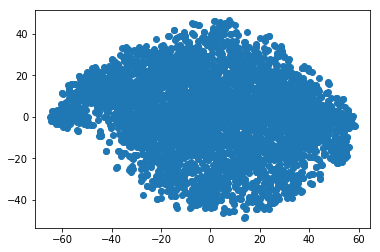

In [140]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

### Analysis

Based on upon the various iterations of t-SNE, some interesting shapes arising suggesting further analysis may be warranted. While we do not see clear clusters (i.e., separation), the "tail" shape based on the raw features may suggest potential clustering opportunities. Based upon our initial analysis, there does not seem to be significant differences in the outputs based on upon the various learning rates, so for the purposes of further analysis we chose a learning rate of 200.

## Final t-SNE Analysis & Conclusions

<b>Purpose:</b> The purpose of this step is to further analyse our t-SNE outputs by layering on our Y variables (regression: Hospital Recommend Score; classification: Star Rating).

### t-SNE with Raw Variables

In [141]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=200)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

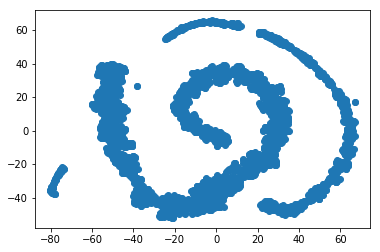

In [142]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### Output with Hospital Recommend Score Layered On (Regression Target Variable)

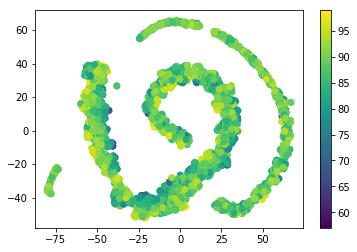

In [143]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=y_reg)
fig.colorbar(im, ax=ax)

#### Output with Star Rating Layered On (Classification Target Variable)

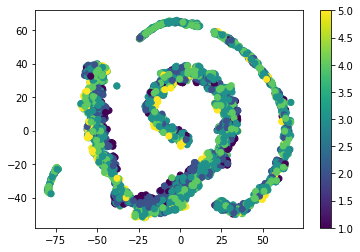

In [144]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=y_class)
fig.colorbar(im, ax=ax)

### t-SNE with Standardized Variables

In [157]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=200)

#Apply fit transform to x 
tsne_features = model.fit_transform(x_s)

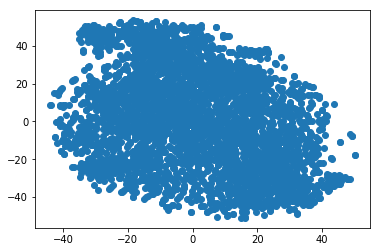

In [158]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

#### Output with Hospital Recommend Score Layered On (Regression Target Variable)

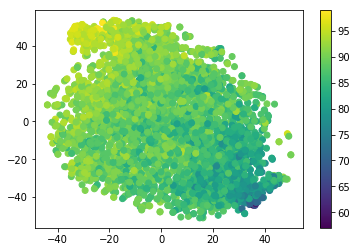

In [159]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=y_reg)
fig.colorbar(im, ax=ax)

#### Output with Star Rating Layered On (Classification Target Variable)

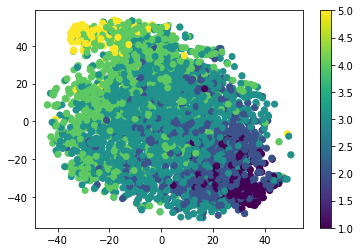

In [160]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=y_class)
fig.colorbar(im, ax=ax)

### Conclusions

Based upon the t-SNE reduction analysis, we see interesting outputs, which indicate further clustering analysis is likely warranted. The t-SNE on our raw X variables shows interesting shapes with some separation in the form of a "tail" shape (even though they are not fully separated clusters). When we layer on our Y variables, it is difficult to see any clear patterns. However, when t-SNE is performed on our standardized X variablese and the Y variables are layered on, it is worth noting the separation between our high and low value Y variables (for both Hospital Recommend Score and Star Rating). Therefore, even though we don't see clear clusters in our ouput, we recommend performing further clustering analysis given the nature of our results.